# Instalação das bibliotecas Pandas e Matplotlib, essenciais para manipulação e visualização de dados.

In [ ]:
pip install pandas matplotlib

# 1- Importando as bibliotecas e  lendo o arquivo.csv
Exibindo a quantidade de linhas do  arquivo


In [25]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo CSV
df = pd.read_csv('googleplaystore.csv')

#tamanho original de linhas
print('a quantidade de linha antes do tratamento é de', df.shape)

a quantidade de linha antes do tratamento é de (10841, 13)


# Removendo as linhas duplicadas e exibindo a quantidade de linhas apos o tratamento

In [26]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

#tamanho  do dataframe depois da remoção das  linhas duplicadas

print('a quantidade de linha depois do de remover as linhas duplicadas é de', df.shape )


a quantidade de linha depois do de remover as linhas duplicadas é de (10358, 13)


# 2- Gráfico de barras dos top 5 apps por número de instalações
Primeiro foi feito o tratamento dos dados na coluna installs,  que foi convertida para número inteiro, pois o valor era um número com vírgula. depois foi removido os valores invalidos ou NaN. então foi gerado o grafico  de barras com os 5 apps com mais instalações.


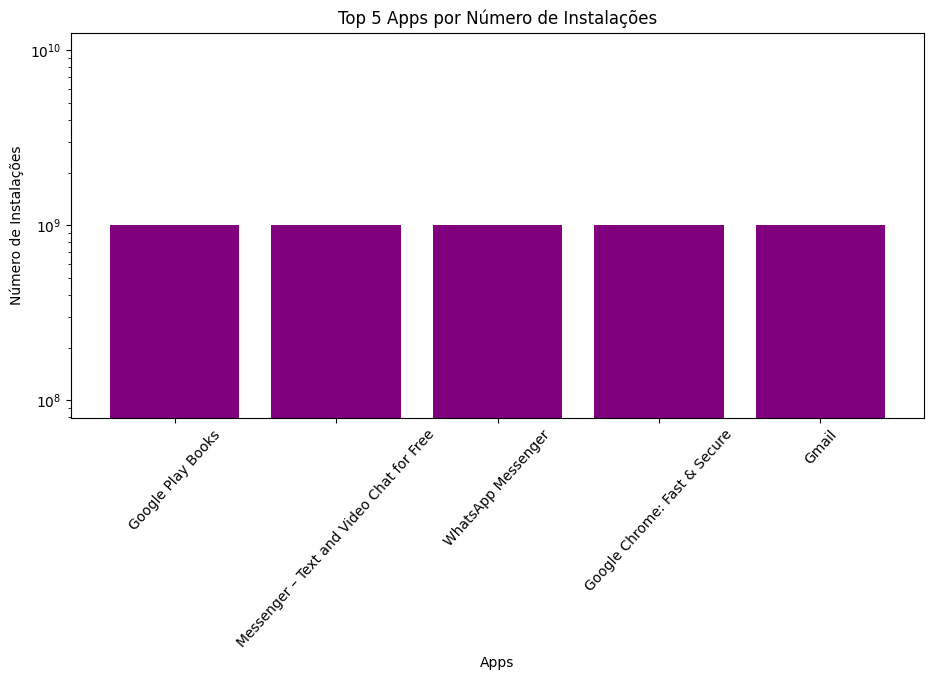

In [27]:
# Limpeza da coluna 'Installs'
df['Installs'] = df['Installs'].astype(str)  # Garantindo que seja string
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)

# Filtrando apenas os valores que podem ser convertidos para int
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)

# Top 5 apps por número de instalações
top_5_apps = df.nlargest(5, 'Installs')

# Gráfico de barras para os 5 apps mais instalados
plt.figure(figsize=(11, 5))
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='purple')
plt.yscale('log') 
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=48)
plt.show()

# 3- Gráfico de pizza mostrando as categorias de apps

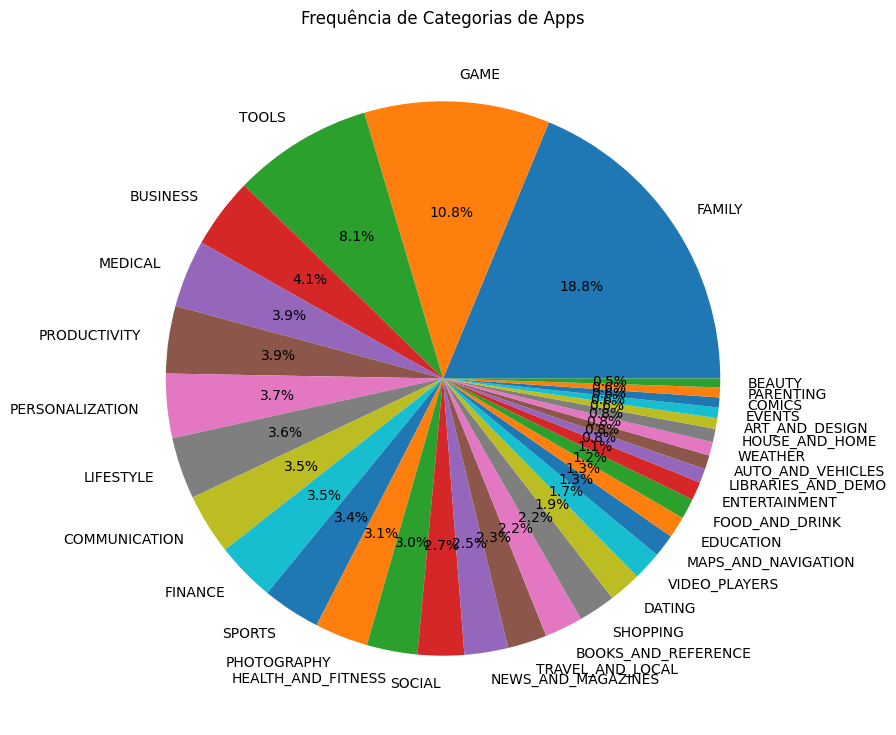

In [28]:
# Contando a frequência de categorias
category_counts = df['Category'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(10, 9))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Frequência de Categorias de Apps')
plt.show()

# 4- Apps mais caros
Primeiro fiz o tramtamento removendo o simbolo de dolar e converti pra float.

In [29]:
# Convertendo para string, removendo o símbolo de dólar e convertendo para float
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)

# Removendo linhas onde o preço é inválido ou NaN
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# App mais caro
app_mais_caro = df.loc[df['Price'].idxmax()]

# Imprimindo o app mais  caro

print(f'O App mais caro é "{app_mais_caro["App"]}", com o preço {app_mais_caro["Price"]:.2f}')

O App mais caro é "I'm Rich - Trump Edition", com o preço 400.00


# 5- Contar apps classificados como 'Mature 17+'

In [30]:
# Contagem de apps com classificação 'Mature 17+'
maior_que_17 = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print('a quantidade de filmes +17 é: ', maior_que_17)


a quantidade de filmes +17 é:  447


# 6- Top 10 apps por número de reviews

In [31]:
# Convertendo a coluna 'Reviews' para tipo numérico, substituindo erros por NaN
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Removendo linhas onde 'Reviews' é NaN, caso existam
df = df.dropna(subset=['Reviews'])

# Garantindo que 'Reviews' é do tipo inteiro
df['Reviews'] = df['Reviews'].astype(int)

# Selecionando os top 10 apps por número de reviews, sem repetir os apps
top10_reviews = df.drop_duplicates(subset='App').nlargest(10, 'Reviews')[['App', 'Reviews']]
top10_reviews


,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


# 7- Mais 2 cálculos sobre o dataset

# Primeiro calculo
### Calculando a média de instalações de 5 categorias com mais instlações

In [32]:
# Calculando a média de instalações de 5 categorias com mais instlações
media_instalacoes_categoria = df.groupby('Category')['Installs'].mean().nlargest(5)

# Exibindo as categorias com maior média de instalações
media_instalacoes_categoria


Category
COMMUNICATION    6.598983e+07
SOCIAL           4.469239e+07
VIDEO_PLAYERS    3.555430e+07
PRODUCTIVITY     3.062185e+07
PHOTOGRAPHY      3.019021e+07
Name: Installs, dtype: float64

# Segundo calculo 
### Calculando a média geral de instalações de todos os aplicativos

In [33]:
# Calculando a média geral de instalações de todos os aplicativos
media_geral_instalacoes = df['Installs'].mean()

# Exibindo a média geral de instalações de apps
print(f"A média geral de instalações de todos os aplicativos é de: {media_geral_instalacoes:.2f}")


A média geral de instalações de todos os aplicativos é de: 14157759.44


# 8- Outras 2 formas gráficas

## Primeira forma grafica
### Gráfico de linha para categorias com maior média de instalações

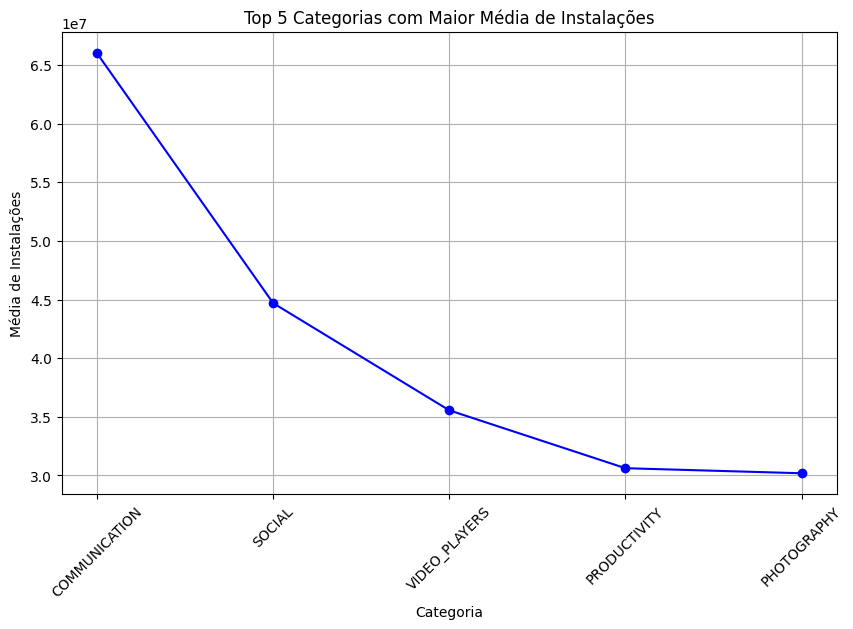

In [34]:
# Gráfico de linha para categorias com maior média de instalações
plt.figure(figsize=(10, 6))
plt.plot(media_instalacoes_categoria.index, media_instalacoes_categoria.values, marker='o', color='b')
plt.title('Top 5 Categorias com Maior Média de Instalações')
plt.xlabel('Categoria')
plt.ylabel('Média de Instalações')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Segunda forma grafica 
### Gráfico de dispersão para analisar a relação entre Reviews e Instalações

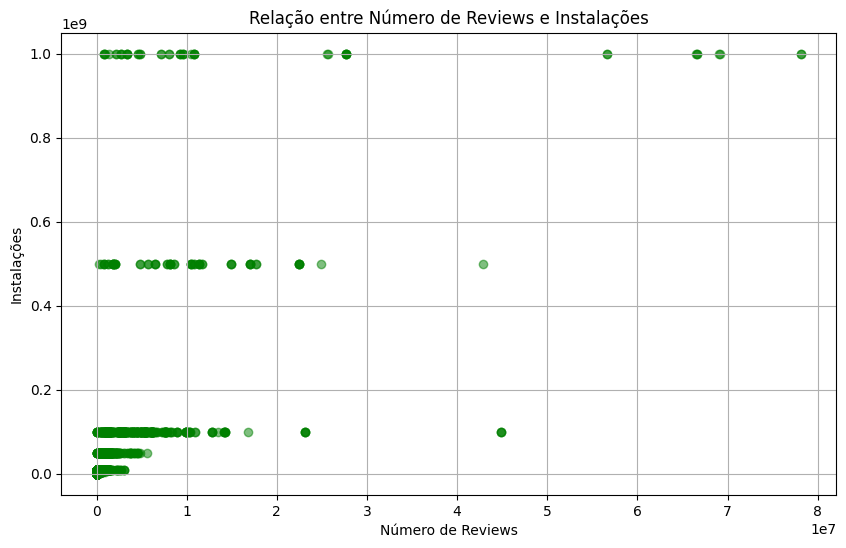

In [35]:
# Gráfico de dispersão para analisar a relação entre Reviews e Instalações
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Installs'], alpha=0.5, c='green')
plt.title('Relação entre Número de Reviews e Instalações')
plt.xlabel('Número de Reviews')
plt.ylabel('Instalações')
plt.grid(True)
plt.show()
